## 线性回归
### 训练数据
* 通常越多越好
```
线性回归是对 n 维输入的加权，外加偏差
使用平方损失来衡量预测值和真实值的差距
线性回归有显式解
线性回归可以看做是单层神经网络
```

## 梯度下降
* 挑选一个初始值 w0
* 重复迭代
  * 计算损失函数关于 w 的梯度
  * 更新 w = w - 学习率 * 梯度
* 沿着梯度方向将增加损失函数的值，因此我们需要沿着负梯度方向更新参数
* 学习率：步长的超参数（超参数是需要人为设定的参数）
### 小批量随机梯度下降
* 在整个训练集上计算梯度开销太大
* 可以随机采样 b 个样本来计算近似损失
* b 称为批量大小，也是一个超参数

features: tensor([-0.4831,  1.8427]) 
label: tensor([-3.0371])


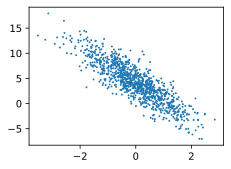

In [1]:
import matplotlib.pyplot as plt
import random
import torch
from d2l import torch as d2l
def synthetic_data(w, b, num_examples):  #@save
    X = torch.normal(0, 1, (num_examples, len(w))) # normal 函数用于生成正态分布随机数
    y = torch.matmul(X, w) + b # matmul 函数用于矩阵乘法
    y += torch.normal(0, 0.01, y.shape)  # 添加噪声
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4]) # true_w 是一个张量，表示线性回归的权重
true_b = 4.2 # true_b 是一个标量，表示线性回归的偏置
features, labels = synthetic_data(true_w, true_b, 1000) # 生成1000个样本
print('features:', features[0],'\nlabel:', labels[0])
# 画图
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features) # 样本数量
    indices = list(range(num_examples)) # range 函数生成一个从0到num_examples-1的整数序列, list 函数将其转换为列表
    random.shuffle(indices) # 随机打乱索引顺序
    for i in range(0, num_examples, batch_size): # 每次取 batch_size 个样本
        batch_indices = torch.tensor(
            indices[i: min(i +batch_size, num_examples)] # 取出当前批次的索引
        )
        yield features[batch_indices], labels[batch_indices] # 生成器，返回当前批次的特征和标签

batch_size = 10 # 批量大小
for X, y in data_iter(batch_size, features, labels):
    print("==", X, '\n', y)

In [4]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True) # 初始化偏置为0

# 定义线性回归模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b # 矩阵乘法加偏置

# 定义平方损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 # 平方损失

# 定义优化算法：小批量随机梯度下降
def sgd(params, lr, batch_size): # params 是模型参数，lr 是学习率，batch_size 是批量大小
    with torch.no_grad(): # 不需要计算梯度
        for param in params:
            param -= lr * param.grad / batch_size # 更新参数
            param.grad.zero_() # 清零梯度

# 训练模型
lr = 0.03 # 学习率
num_epochs = 3 # 训练轮数
net = linreg #
loss = squared_loss # 损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # 计算损失
        l.sum().backward() # 反向传播计算梯度
        sgd([w, b], lr, batch_size) # 更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) # 计算训练集上的损失
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}') # 打印损失

epoch 1, loss 0.03302144259214401
epoch 2, loss 0.0001249234628630802
epoch 3, loss 5.6291319197043777e-05


In [ ]:
# 线性回归的简洁实现
import numpy as np
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True): #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays) # 创建数据集, *的作用
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # 创建数据迭代器
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))


In [6]:
# 使用框架的预定义好的层
from torch import nn # nn is short for neural networks
net = nn.Sequential(nn.Linear(2, 1)) # 定义一个线性层

net[0].weight.data.normal_(0, 0.01) # 初始化权重
net[0].bias.data.fill_(0) # 初始化偏置

tensor([0.])

In [13]:
# 使用均方误差
loss = nn.MSELoss() # 定义均方误差损失函数
# 实例化 SGD 实例 ，SGD is short for stochastic gradient descent，即随机梯度下降
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) # 计算损失
        trainer.zero_grad() # 梯度清零
        l.backward() # 反向传播计算梯度
        trainer.step() # 更新参数
    l = loss(net(features), labels) # 计算训练集上的损失
    print(f'epoch {epoch + 1}, loss {l:f}') # 打印损失

epoch 1, loss 0.000112
epoch 2, loss 0.000114
epoch 3, loss 0.000113
